In [1]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import os
from inspect import cleandoc
import timeit
from experiments.benchmark_utils import do_op_instrumentation_benchmarks, \
    do_op_inspections_benchmarks, OperatorBenchmarkType
import matplotlib
import statistics

from mlinspect.utils import get_project_root

Defined plot_runtimes, example output:


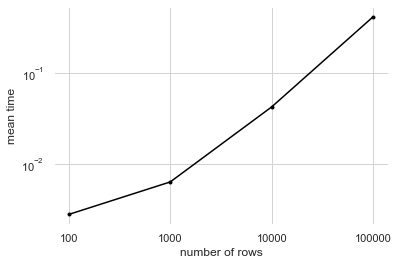

In [2]:
def plot_runtimes(run_row_numbers, time_per_run, title_and_path, save_to_file=False):
    # Data for plotting
    np_times = np.array(time_per_run)
    np_row_numbers = np.array(run_row_numbers)

    # Note that using plt.subplots below is equivalent to using
    # fig = plt.figure() and then ax = fig.add_subplot(111)
    fig, ax = plt.subplots()
    
    ax.set_yscale('log') # TODO: Decide how to plot this
    ax.plot(np_times, marker='o', color='black', markersize=3)
    
    ax.set_xticks(range(0,len(run_row_numbers)))
    ax.set_xticklabels(run_row_numbers)
    
    ax.set_facecolor('white')
    
    #major_ticks = np.arange(0, 10, 3)
    #ax.set_yticks(major_ticks)
    
    # ax.set_ylim([0,10])
    ax.set(xlabel='number of rows', ylabel='mean time')
    ax.grid(True, color='lightgrey')
    if save_to_file:
        fig.savefig(title_and_path + '.svg', bbox_inches='tight')
        fig.savefig(title_and_path + '.png', bbox_inches='tight', dpi=800)
    
    plt.show()
    plt.close()
    
test_row_numbers = [100, 1000, 10000, 100000]
test_plot_runtimes = [0.0028039772499999227, 0.006364328399999941, 0.04229586309999993, 0.4114196768999999]

print('Defined plot_runtimes, example output:')
plot_runtimes(test_row_numbers, test_plot_runtimes, 'test_plot_runtimes')

Defined plot_runtimes_all, example output:


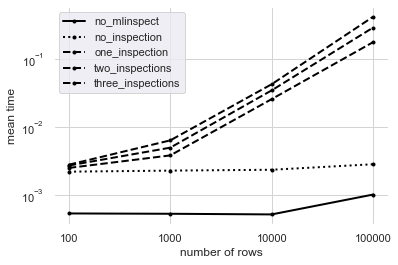

In [3]:
def plot_runtimes_all(run_row_numbers, benchmark_results, linestyles, title_and_path, save_to_file=False):
    # Note that using plt.subplots below is equivalent to using
    # fig = plt.figure() and then ax = fig.add_subplot(111)
    fig, ax = plt.subplots()
    ax.set_yscale('log') # TODO: Decide how to plot this
    
    #ax.plot(losses_orig, marker='o', color='black', linewidth=2, linestyle='dashed', label="orig")
    for label, results in benchmark_results.items():
        # Data for plotting
        np_times = np.array(results)
        if label in linestyles:
            linestyle = linestyles[label]
            ax.plot(np_times, marker='o', color='black', linewidth=2, linestyle=linestyle, label=label, markersize=3)
    
    ax.set_xticks(range(0,len(run_row_numbers)))
    ax.set_xticklabels(run_row_numbers)
    
    ax.set_facecolor('white')
    
    # major_ticks = np.arange(0, 10, 3)
    # ax.set_yticks(major_ticks)
    
    # ax.set_ylim([0,10])
    ax.set(xlabel='number of rows', ylabel='mean time')
    ax.grid(True, color='lightgrey')
    
    plt.legend()
    
    if save_to_file:
        fig.savefig(title_and_path + '.svg', bbox_inches='tight')
        fig.savefig(title_and_path + '.png', bbox_inches='tight', dpi=800)
    
    plt.show()
    plt.close()

test_row_numbers = [100, 1000, 10000, 100000]
test_benchmark_results = {\
    "no_mlinspect": [0.0005420450000000798, 0.0005361602000002463, 0.0005246571999999005, 0.0010252619999999268],
    "no_inspection": [0.0022168788499999257, 0.0022983642499999402, 0.0023646199999999506, 0.0028484614500001726],
    "one_inspection": [0.002515717000000084, 0.0038362508500000116, 0.025606818549999976, 0.17484780609999992],
    "two_inspections": [0.002726666, 0.004980573499999963, 0.03439934060000005, 0.28592700379999964],
    "three_inspections": [0.0028039772499999227, 0.006364328399999941, 0.04229586309999993, 0.4114196768999999]
}

print('Defined plot_runtimes_all, example output:')
linestyles = {"no_mlinspect": "solid", 
             "no_inspection": "dotted", 
             "one_inspection": "dashed", 
             "two_inspections": "dashed", 
             "three_inspections": "dashed"}
plot_runtimes_all(test_row_numbers, test_benchmark_results, linestyles, 'test_plot_runtimes_all')

In [4]:
def benchmark_op_instrumentation_and_plot_result(op_type: OperatorBenchmarkType, plot_linestyles):
    print("Instrumentation Results for {}".format(op_type.value))
    mean_benchmark_results = {}

    for row_number in row_numbers:
        benchmark_results = do_op_instrumentation_benchmarks(row_number, op_type)
        for label, results in benchmark_results.items():
            current_list = mean_benchmark_results.get(label, [])
            current_list.append(statistics.mean(results))
            mean_benchmark_results[label] = current_list

        print("Done: {}".format(row_number))

    for label, results in mean_benchmark_results.items():
        print("{}: {}".format(label, results))
    
    plot_runtimes_all(row_numbers, mean_benchmark_results, plot_linestyles, 'all_runtimes_projection')

In [5]:
def benchmark_op_inspections_and_plot_result(op_type: OperatorBenchmarkType, plot_linestyles):
    print("Inspection Results for {}".format(op_type.value))
    mean_benchmark_results = {}

    for row_number in row_numbers:
        benchmark_results = do_op_inspections_benchmarks(row_number, op_type)
        for label, results in benchmark_results.items():
            current_list = mean_benchmark_results.get(label, [])
            current_list.append(statistics.mean(results))
            mean_benchmark_results[label] = current_list

        print("Done: {}".format(row_number))

    for label, results in mean_benchmark_results.items():
        print("{}: {}".format(label, results))
    
    plot_runtimes_all(row_numbers, mean_benchmark_results, plot_linestyles, 'all_runtimes_projection')

In [6]:
row_numbers = [100, 1000, 10000]
#row_numbers = [100, 1000, 10000, 100000]
#row_numbers = [100, 1000, 10000, 100000, 1000000]

instrumentation_linestyles = {"no mlinspect": "solid", # Can be commented out to remove it from plot
    "no inspection": "dotted", 
    "one inspection": "dashed", 
    "two inspections": "dashed", 
    "three inspections": "dashed"}

inspection_linestyles = {"empty inspection": "solid",
    "MaterializeFirstRowsInspection(10)": "dotted", 
    "LineageInspection(10)": "dashed", 
    "HistogramInspection(['cat'])": "dashdot"}

Instrumentation Results for projection
Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.0007835269999999283, 0.0007091885999995995, 0.0007247217999998057, 0.000880622999999936]
no inspection: [0.003543679599999905, 0.0027578733999998662, 0.0025145941999996425, 0.002462853599999626]
one inspection: [0.0038324923999999427, 0.003924042399999906, 0.0205367006000003, 0.17507433699999986]
two inspections: [0.00416762559999988, 0.005093333200000138, 0.032400077200000155, 0.2950320050000002]
three inspections: [0.0034578579999998025, 0.006251812400000212, 0.04877564840000002, 0.3868267620000001]


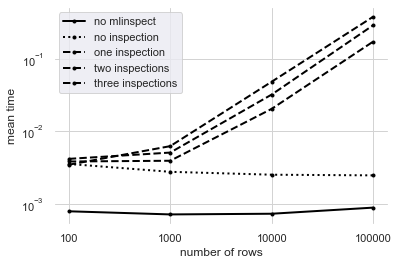

In [7]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.PROJECTION, instrumentation_linestyles)

Instrumentation Results for selection
Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.000502267599999584, 0.0005781212000009362, 0.0005846558000001778, 0.0020794107999996926]
no inspection: [0.005889540200000454, 0.005309488599999667, 0.006001394999999831, 0.018087062600000082]
one inspection: [0.00882882299999892, 0.011343627800000177, 0.038527432400000096, 0.313040468600002]
two inspections: [0.00914770400000009, 0.01363143760000014, 0.05568491820000006, 0.4807578612]
three inspections: [0.009550156400000986, 0.014759248000000724, 0.0714029348000004, 0.6732782540000024]


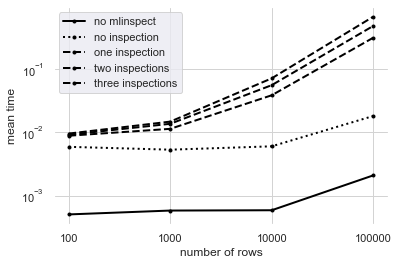

In [8]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.SELECTION, instrumentation_linestyles)

Instrumentation Results for join
Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.0025464280000008443, 0.001901276200000268, 0.0033432536000006507, 0.01897225020000093]
no inspection: [0.0064730698000019515, 0.006319349200001057, 0.012955363200001102, 0.05887339740000073]
one inspection: [0.0144793983999989, 0.018087802999998813, 0.05809813080000055, 0.43273960880000006]
two inspections: [0.017320997800000272, 0.01973808240000068, 0.07043767020000188, 0.576479202600001]
three inspections: [0.015493028799998854, 0.030041204599999104, 0.0839958702000004, 0.7427371629999981]


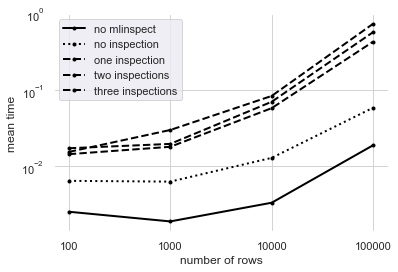

In [9]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.JOIN, instrumentation_linestyles)

Instrumentation Results for one_hot_encoder
Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.0005220379999997249, 0.0007303684000007138, 0.0024281770000001758, 0.0188788011999975]
no inspection: [0.002358891400000118, 0.002120493800002521, 0.0037338811999987342, 0.022414419600002587]
one inspection: [0.0023012055999998894, 0.0037618346000002135, 0.018544590600001243, 0.16468085280000083]
two inspections: [0.0024643494000002875, 0.004862429399999257, 0.029159993799999027, 0.283486744599999]
three inspections: [0.002554329199999472, 0.005931052799999748, 0.0459803650000012, 0.36321538400000575]


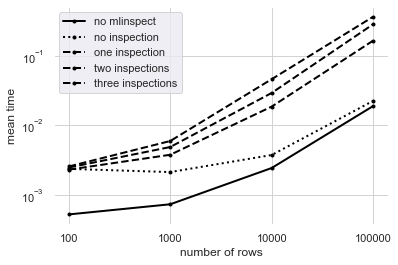

In [10]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.ONE_HOT_ENCODER, instrumentation_linestyles)

Instrumentation Results for standard_scaler
Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.0025907066000030454, 0.002390739200001235, 0.0027344199999987497, 0.0030725207999978466]
no inspection: [0.004363308799997867, 0.003813886399996136, 0.003731241400001295, 0.004314170599997169]
one inspection: [0.003985695400001532, 0.005345227800000884, 0.018911334000000578, 0.14779215819999933]
two inspections: [0.004143174000003569, 0.006396082000003389, 0.028655584800000612, 0.25346371500000087]
three inspections: [0.0041934040000001, 0.008725094599995487, 0.03809427280000364, 0.34922868219999825]


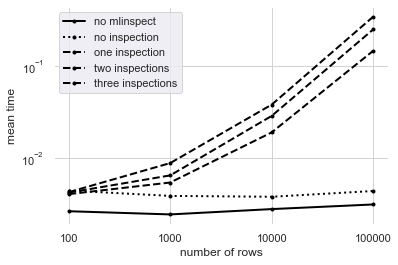

In [11]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.STANDARD_SCALER, instrumentation_linestyles)

Instrumentation Results for decision_tree
Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.003323003400001312, 0.01316954699999826, 0.0635283170000008, 0.6447709610000004]
no inspection: [0.006192038399998978, 0.012229583999996407, 0.06513924119999785, 0.6360448570000017]
one inspection: [0.009102005200000462, 0.023152068800001757, 0.1425143174000027, 1.4451813152]
two inspections: [0.010186714200000325, 0.02384700679999696, 0.16307065999999965, 1.6599025302000001]
three inspections: [0.010530507799995804, 0.024353535199998076, 0.17022320499999638, 1.7371933418000025]


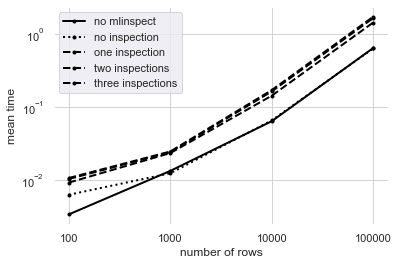

In [12]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.DECISION_TREE, instrumentation_linestyles)

Inspection Results for projection
Done: 100
Done: 1000
Done: 10000
Done: 100000
empty inspection: [0.002975048999996943, 0.003930150000007871, 0.019418340200007832, 0.17574859079999783]
MaterializeFirstRowsInspection(10): [0.0025825519999955306, 0.004362175999995088, 0.02063558960001046, 0.18623108319998777]
LineageInspection(10): [0.0029464561999986926, 0.004517764799987845, 0.02260249019999492, 0.19854630699999803]
HistogramInspection(['cat']): [0.0023707661999992522, 0.004540664799986871, 0.026487201799994864, 0.24518809260000013]


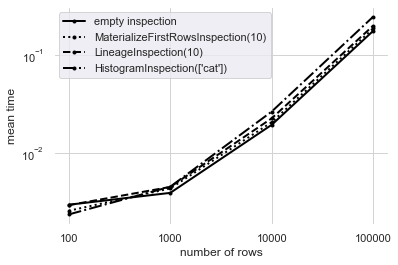

In [13]:
benchmark_op_inspections_and_plot_result(OperatorBenchmarkType.PROJECTION, inspection_linestyles)

Inspection Results for selection
Done: 100
Done: 1000
Done: 10000
Done: 100000
empty inspection: [0.009945120399993356, 0.011732766800002991, 0.03996169479999594, 0.3264577761999988]
MaterializeFirstRowsInspection(10): [0.009646722399997998, 0.012386519199998247, 0.04208345039999699, 0.3313011991999929]
LineageInspection(10): [0.01045848960000626, 0.013264363799999046, 0.04293947660000299, 0.3666139447999967]
HistogramInspection(['cat']): [0.009058300199990299, 0.01251481140000692, 0.04849746200000595, 0.43116898680000304]


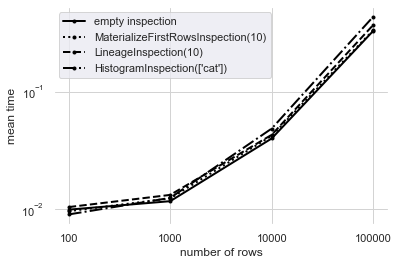

In [14]:
benchmark_op_inspections_and_plot_result(OperatorBenchmarkType.SELECTION, inspection_linestyles)

Inspection Results for join
Done: 100
Done: 1000
Done: 10000
Done: 100000
empty inspection: [0.016885864000005312, 0.017898243000001913, 0.054029872799992516, 0.4374357795999913]
MaterializeFirstRowsInspection(10): [0.015440876999991814, 0.018667950799999743, 0.05548101999999631, 0.44853126900000007]
LineageInspection(10): [0.01514528180000525, 0.019228362199999082, 0.06283775660000401, 0.616562488400001]
HistogramInspection(['cat']): [0.014231900799995856, 0.018644881400001624, 0.062210090200011336, 0.5635268782000026]


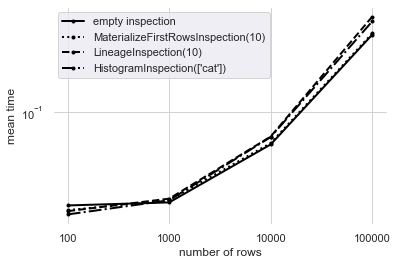

In [15]:
benchmark_op_inspections_and_plot_result(OperatorBenchmarkType.JOIN, inspection_linestyles)

Inspection Results for one_hot_encoder
Done: 100
Done: 1000
Done: 10000
Done: 100000
empty inspection: [0.0031716600000038396, 0.0038902511999935998, 0.018520819000002575, 0.17905127620000486]
MaterializeFirstRowsInspection(10): [0.003237389600002416, 0.004462619600002426, 0.01936574659999337, 0.16860776339999006]
LineageInspection(10): [0.0036510059999955045, 0.004884807199999841, 0.025745176200001652, 0.1826440171999934]
HistogramInspection(['cat']): [0.0025728456000081224, 0.004562726600005363, 0.027759040000006507, 0.2331693059999907]


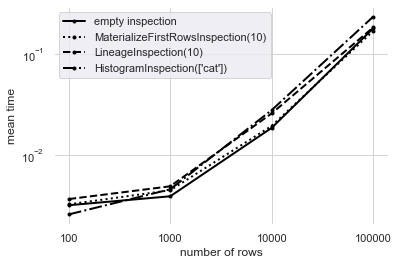

In [16]:
benchmark_op_inspections_and_plot_result(OperatorBenchmarkType.ONE_HOT_ENCODER, inspection_linestyles)